# `GPUTree` explainer

This notebooks demonstrates how to use the GPUTree explainer on some simple datasets. Like the Tree explainer, the GPUTree explainer is specifically designed for tree-based machine learning models, but it is designed to accelerate the computations using NVIDA GPUs.

Note that in order to use the GPUTree explainer you need to have an NVIDA GPU, and SHAP needs to have been compiled to support the current GPU libraries on your system. On a recent Ubuntu server the steps to make this happen would be:

1. Check to makes sure you have the NVIDA CUDA Toolkit installed by running the `nvcc` command (the CUDA compiler) from the terminal. If this command is not found then you need to install it with something like `sudo apt install nvidia-cuda-toolkit`.
2. Once the NVIDA CUDA Toolkit is installed you need to set the CUDA_PATH environment variable. If `which nvcc` produces `/usr/bin/nvcc` then you can run `export CUDA_PATH=/usr`.
3. Build SHAP with CUDA support by cloning the shap repo using `git clone https://github.com/slundberg/shap.git` then running `python setup.py install --user`.

If you run into issues with the above instructions, make sure you don't still have an old version of SHAP around by ensuring `import shap` fails before you start the new install.

Below we domonstrate how to use the GPUTree explainer on a simple adult income classification dataset and model.

In [1]:
import shap
import xgboost

# get a dataset on income prediction
X,y = shap.datasets.adult()

# train an XGBoost model (but any other model type would also work)
model = xgboost.XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Tabular data with independent (Shapley value) masking

In [2]:
# build a Permutation explainer and explain the model predictions on the given dataset
explainer = shap.explainers.GPUTree(model, X)
shap_values = explainer(X)

# get just the explanations for the positive class
shap_values = shap_values

### Plot a global summary

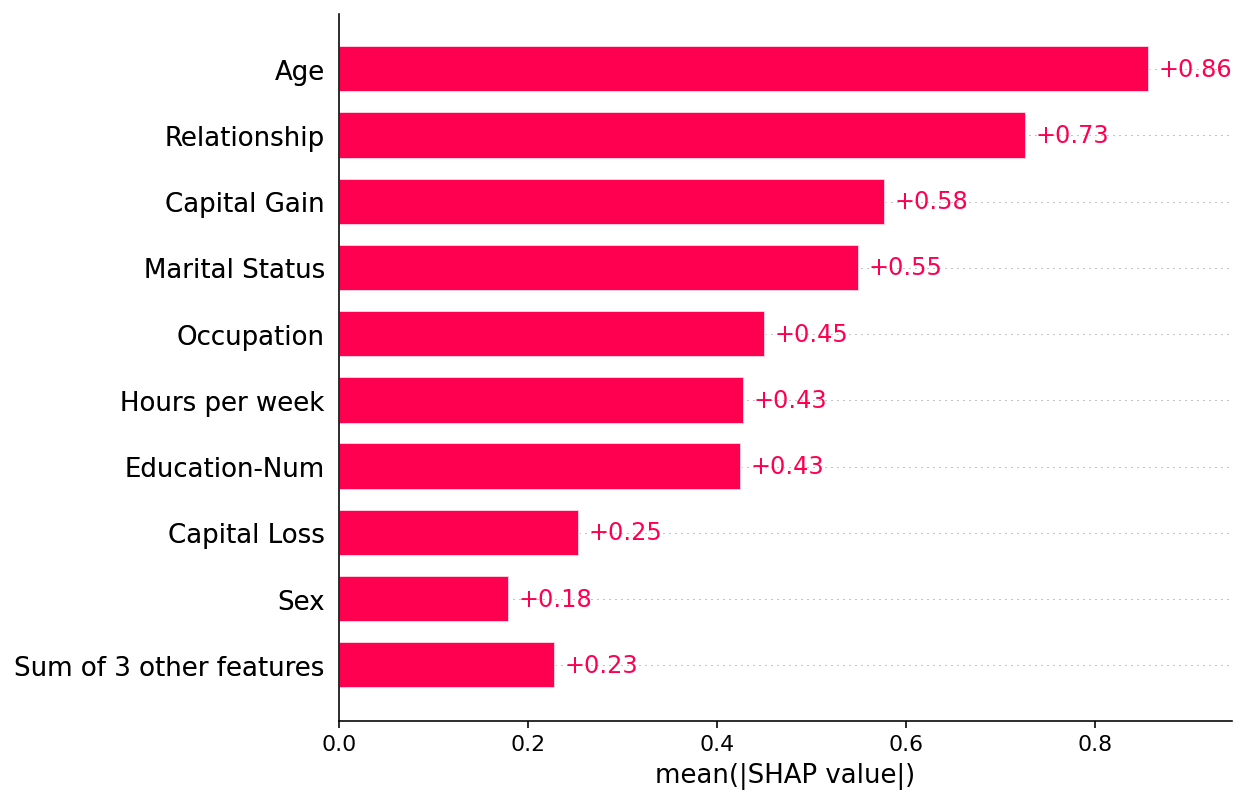

In [3]:
shap.plots.bar(shap_values)

### Plot a single instance

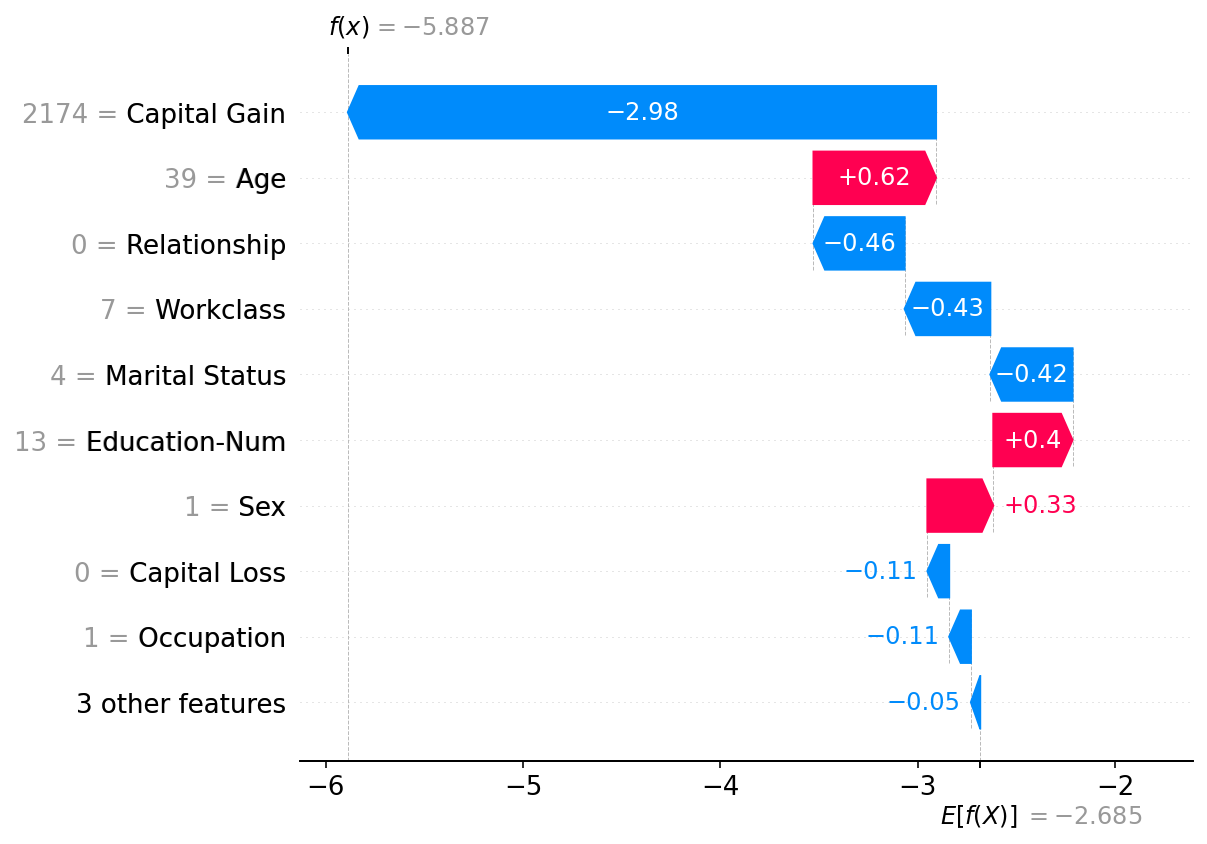

In [4]:
shap.plots.waterfall(shap_values[0])

## Interaction values

GPUTree support the Shapley taylor interaction values (an improvement over what the Tree explainer original provided).

In [5]:
explainer2 = shap.explainers.GPUTree(model, feature_perturbation="tree_path_dependent")
interaction_shap_values = explainer2(X[:100], interactions=True)

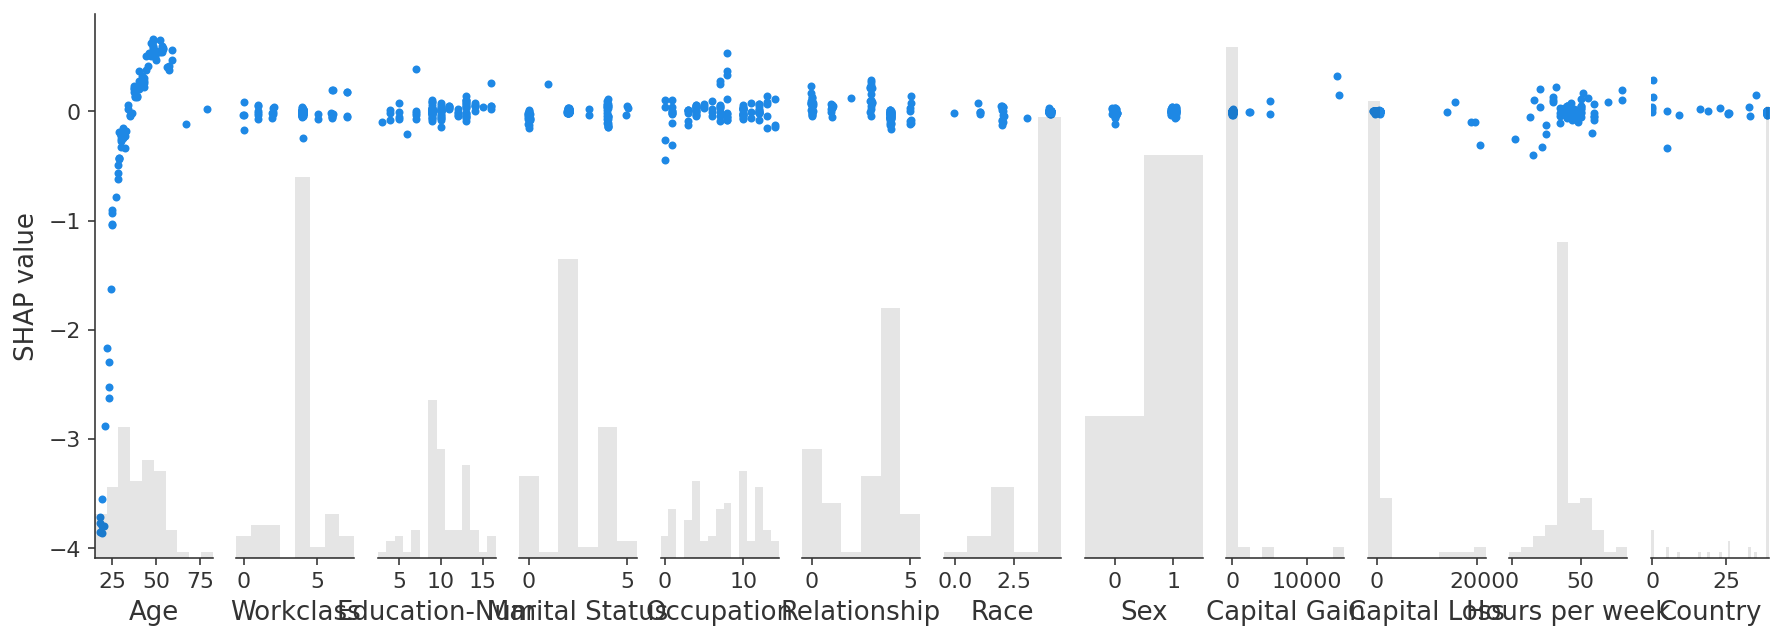

In [6]:
shap.plots.scatter(interaction_shap_values[:,:,0])

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 